# **Used Cars Price Prediction**

**Required Libraries**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from scipy.stats import uniform, randint
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score
import joblib
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import re




**Loading the Dataset**

In [ ]:
df= pd.read_csv('cars_24_combined.csv')

In [ ]:
df.head()

,Unnamed: 0,Car Name,Year,Distance,Owner,Fuel,Location,Drive,Type,Price
0,0,Maruti S PRESSO,2022.0,3878,1,PETROL,HR-98,Manual,HatchBack,514000
1,1,Hyundai Xcent,2018.0,32041,1,PETROL,TN-22,Manual,Sedan,674000
2,2,Tata Safari,2021.0,96339,1,DIESEL,TS-08,Automatic,SUV,1952000
3,3,Maruti Vitara Brezza,2019.0,51718,1,DIESEL,WB-24,Manual,SUV,690000
4,4,Tata Tiago,2021.0,19811,1,PETROL,HR-51,Manual,HatchBack,526000


**Data Cleaning**

In [ ]:
df.drop(['Unnamed: 0'], axis=1,inplace= True)


In [ ]:
df.head(10)

,Car Name,Year,Distance,Owner,Fuel,Location,Drive,Type,Price
0,Maruti S PRESSO,2022.0,3878,1,PETROL,HR-98,Manual,HatchBack,514000
1,Hyundai Xcent,2018.0,32041,1,PETROL,TN-22,Manual,Sedan,674000
2,Tata Safari,2021.0,96339,1,DIESEL,TS-08,Automatic,SUV,1952000
3,Maruti Vitara Brezza,2019.0,51718,1,DIESEL,WB-24,Manual,SUV,690000
4,Tata Tiago,2021.0,19811,1,PETROL,HR-51,Manual,HatchBack,526000
5,Maruti Swift,2017.0,70129,1,PETROL,MH-14,Manual,HatchBack,552000
6,Hyundai i20,2012.0,103781,1,PETROL,NaN,Manual,HatchBack,278000
7,Renault Kwid,2021.0,31945,2,PETROL,UP-32,Automatic,HatchBack,518000
8,Hyundai Grand i10,2015.0,39950,1,PETROL,HR-26,Manual,HatchBack,443000
9,Maruti Swift,2018.0,56697,1,DIESEL,KA-04,Automatic,HatchBack,710350


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8015 entries, 0 to 8014
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Car Name  8014 non-null   object 
 1   Year      8014 non-null   float64
 2   Distance  8015 non-null   int64  
 3   Owner     8015 non-null   int64  
 4   Fuel      8015 non-null   object 
 5   Location  7802 non-null   object 
 6   Drive     8015 non-null   object 
 7   Type      8015 non-null   object 
 8   Price     8015 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 563.7+ KB


In [ ]:
df.tail(3000)

,Car Name,Year,Distance,Owner,Fuel,Location,Drive,Type,Price
5015,Maruti Swift,2017.0,79464,1,DIESEL,MH-12,Manual,HatchBack,640000
5016,Hyundai Verna,2016.0,54340,2,DIESEL,MH-01,Manual,Sedan,736000
5017,Hyundai i20,2014.0,34836,2,PETROL,KA-01,Manual,HatchBack,552800
5018,Skoda Rapid,2016.0,100263,1,DIESEL,UP-16,Manual,Sedan,422000
5019,Maruti Swift Dzire,2017.0,33065,1,PETROL,KL-39,Automatic,Sedan,504000
...,...,...,...,...,...,...,...,...,...
8010,Datsun Redi Go,2018.0,11500,1,PETROL,MH-01,Manual,HatchBack,292000
8011,Toyota YARIS,2018.0,73393,2,PETROL,KA-03,Manual,Sedan,534000
8012,Volkswagen Ameo,2016.0,83810,2,PETROL,UP-78,Manual,Sedan,424000
8013,Hyundai GRAND I10 NIOS,2019.0,39162,1,PETROL,CH-01,Automatic,HatchBack,685000


In [ ]:
df['Car Name'].unique()

array(['Maruti S PRESSO', 'Hyundai Xcent', 'Tata Safari',
       'Maruti Vitara Brezza', 'Tata Tiago', 'Maruti Swift',
       'Hyundai i20', 'Renault Kwid', 'Hyundai Grand i10', 'Maruti IGNIS',
       'Honda Brio', 'Hyundai Elite i20', 'Honda City', 'Maruti Baleno',
       'Honda WR-V', 'Honda Amaze', 'Maruti Alto 800', 'Maruti Celerio',
       'Ford Ecosport', 'Maruti Ciaz', 'Datsun Redi Go', 'Tata TIAGO NRG',
       'Hyundai Santro Xing', 'Ford FREESTYLE', 'Maruti Dzire',
       'Maruti Alto', 'Hyundai NEW SANTRO', 'Maruti Alto K10',
       'Ford Endeavour', 'Maruti Swift Dzire', 'Maruti Wagon R 1.0',
       'Hyundai GRAND I10 NIOS', 'Maruti Celerio X',
       'Toyota URBAN CRUISER', 'Mahindra XUV500', 'Hyundai Verna',
       'Hyundai VENUE', 'Tata NEXON', 'Mahindra KUV 100 NXT',
       'Toyota YARIS', 'Mahindra XUV 3OO', 'Renault TRIBER',
       'Hyundai Tucson New', 'Mahindra TUV300', 'Toyota Glanza',
       'Maruti Eeco', 'Renault Duster', 'Hyundai i10', 'Nissan MAGNITE',
       '

In [ ]:
#Extract Company Names
df['Company'] = df["Car Name"].apply(lambda x:  re.split(r'[ \t]', x)[0] if pd.notna(x) else x)


In [ ]:
df.head(10)

,Car Name,Year,Distance,Owner,Fuel,Location,Drive,Type,Price,Company
0,Maruti S PRESSO,2022.0,3878,1,PETROL,HR-98,Manual,HatchBack,514000,Maruti
1,Hyundai Xcent,2018.0,32041,1,PETROL,TN-22,Manual,Sedan,674000,Hyundai
2,Tata Safari,2021.0,96339,1,DIESEL,TS-08,Automatic,SUV,1952000,Tata
3,Maruti Vitara Brezza,2019.0,51718,1,DIESEL,WB-24,Manual,SUV,690000,Maruti
4,Tata Tiago,2021.0,19811,1,PETROL,HR-51,Manual,HatchBack,526000,Tata
5,Maruti Swift,2017.0,70129,1,PETROL,MH-14,Manual,HatchBack,552000,Maruti
6,Hyundai i20,2012.0,103781,1,PETROL,NaN,Manual,HatchBack,278000,Hyundai
7,Renault Kwid,2021.0,31945,2,PETROL,UP-32,Automatic,HatchBack,518000,Renault
8,Hyundai Grand i10,2015.0,39950,1,PETROL,HR-26,Manual,HatchBack,443000,Hyundai
9,Maruti Swift,2018.0,56697,1,DIESEL,KA-04,Automatic,HatchBack,710350,Maruti


In [ ]:
df['Year'].unique()

array([2022., 2018., 2021., 2019., 2017., 2012., 2015., 2014., 2016.,
       2010., 2011., 2013., 2020.,   nan, 2023.])

In [ ]:
df['Distance'].unique()

array([ 3878, 32041, 96339, ..., 83810, 39162, 82009])

In [ ]:
df['Owner'].unique()

array([1, 2, 3, 4])

In [ ]:
df['Fuel'].unique()

array(['PETROL', 'DIESEL', 'CNG', 'LPG'], dtype=object)

In [ ]:
df['Location'].unique()

array(['HR-98', 'TN-22', 'TS-08', 'WB-24', 'HR-51', 'MH-14', nan, 'UP-32',
       'HR-26', 'KA-04', 'PB-10', 'MH-48', 'GJ-05', 'GJ-27', 'MH-47',
       'KA-01', 'MH-01', 'GJ-01', 'PB-91', 'TN-19', 'UP-16', 'KA-19',
       'WB-02', 'DL-8C', 'DL-12', 'CH-01', 'KA-53', 'KA-02', 'TS-13',
       'KL-22', 'KL-09', 'HR-10', 'MH-05', 'TS-07', 'DL-11', 'MH-46',
       'MH-12', 'MH-04', 'KA-05', 'UP-14', 'HR-16', 'DL-9C', 'GJ-02',
       'RJ-02', 'BR-01', 'MH-02', 'DL-14', 'TN-02', 'KL-27', 'UP-78',
       'TN-14', 'KL-45', 'WB-90', 'AP-23', 'KL-41', 'PB-70', 'TN-09',
       'MH-03', 'DL-1C', 'MP-09', 'KL-01', 'KA-03', 'WB-20', 'DL-10',
       'DL-3C', 'KL-36', 'KA-09', 'TN-07', 'TS-10', 'RJ-36', 'HR-35',
       'PB-08', 'GJ-18', 'RJ-14', 'UP-37', 'GJ-38', 'HR-03', 'HR-52',
       'GJ-06', 'AP-29', 'TN-59', 'HR-36', 'GJ-32', 'GJ-08', 'TS-12',
       'WB-26', 'TN-06', 'KA-41', 'UP-65', 'MP-04', 'GJ-03', 'AP-10',
       'HR-13', 'DL-5C', 'KA-51', 'TN-58', 'DL-2C', 'MH-15', 'PB-07',
       'HR-30',

In [ ]:
df.drop(['Location'],axis=1, inplace=True)

In [ ]:
df.drop(['Car Name'],axis=1,inplace=True)

In [ ]:
df.head()

,Year,Distance,Owner,Fuel,Drive,Type,Price,Company
0,2022.0,3878,1,PETROL,Manual,HatchBack,514000,Maruti
1,2018.0,32041,1,PETROL,Manual,Sedan,674000,Hyundai
2,2021.0,96339,1,DIESEL,Automatic,SUV,1952000,Tata
3,2019.0,51718,1,DIESEL,Manual,SUV,690000,Maruti
4,2021.0,19811,1,PETROL,Manual,HatchBack,526000,Tata


In [ ]:
df['Year'].isnull().sum()

1

In [ ]:
df.dropna(inplace=True)

In [ ]:
df['Year'].isnull().sum()

0

In [ ]:
df['Type'].unique()

array(['HatchBack', 'Sedan', 'SUV', 'Lux_SUV', 'Lux_sedan'], dtype=object)

In [ ]:
df['Fuel'].unique()

array(['PETROL', 'DIESEL', 'CNG', 'LPG'], dtype=object)

In [ ]:
df.loc[df['Company'] == 'Hyundai', 'Fuel'] = 'PETROL'
df['Fuel'].unique()

array(['PETROL', 'DIESEL', 'CNG'], dtype=object)

In [ ]:
df['Year'].unique()

array([2022., 2018., 2021., 2019., 2017., 2012., 2015., 2014., 2016.,
       2010., 2011., 2013., 2020., 2023.])

In [ ]:
df['Year'] = df['Year'].astype(int)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8014 entries, 0 to 8014
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Year      8014 non-null   int64 
 1   Distance  8014 non-null   int64 
 2   Owner     8014 non-null   int64 
 3   Fuel      8014 non-null   object
 4   Drive     8014 non-null   object
 5   Type      8014 non-null   object
 6   Price     8014 non-null   int64 
 7   Company   8014 non-null   object
dtypes: int64(4), object(4)
memory usage: 563.5+ KB


In [ ]:
df['Company'].unique()

array(['Maruti', 'Hyundai', 'Tata', 'Renault', 'Honda', 'Ford', 'Datsun',
       'Toyota', 'Mahindra', 'Nissan', 'KIA', 'Volkswagen', 'Skoda',
       'BMW', 'Jeep', 'MG'], dtype=object)

In [ ]:
df['Drive'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [ ]:
df['Price'].isnull().sum()

0

**Data Analysis**

In [ ]:
import matplotlib.pyplot as plt

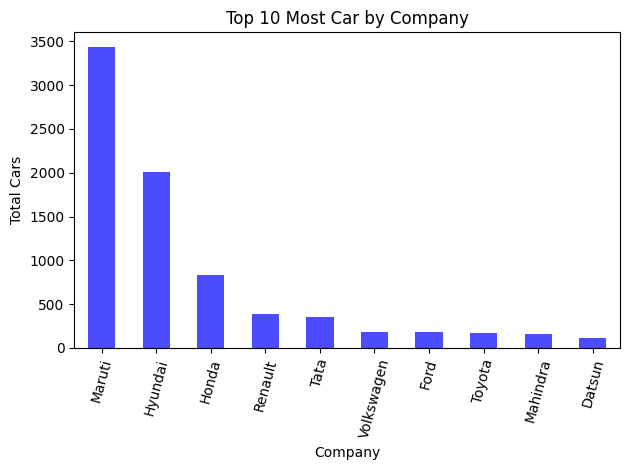

In [ ]:
top_ten_cars = df['Company'].value_counts().head(10)

# Plotting the top ten cars
top_ten_cars.plot(kind='bar', color='blue', alpha=0.7)
plt.xlabel('Company')
plt.ylabel('Total Cars')
plt.title('Top 10 Most Car by Company')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()


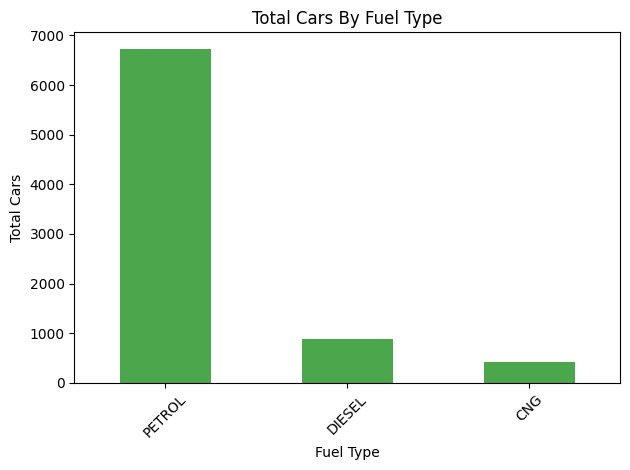

In [ ]:
Car_Fuel_type = df['Fuel'].value_counts().head(3)

# Plotting cars  by Fuel type
Car_Fuel_type.plot(kind='bar', color='green', alpha=0.7)
plt.xlabel('Fuel Type')
plt.ylabel('Total Cars')
plt.title('Total Cars By Fuel Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


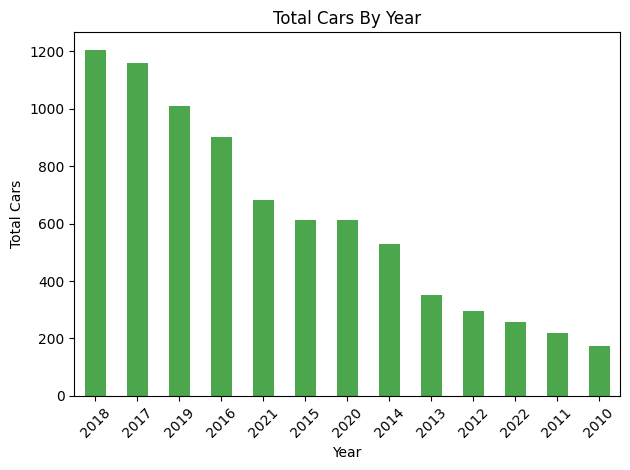

In [ ]:
Car_sold_by_year = df['Year'].value_counts().head(13)

# Plotting cars  by Fuel type
Car_sold_by_year.plot(kind='bar', color='green', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Total Cars')
plt.title('Total Cars By Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


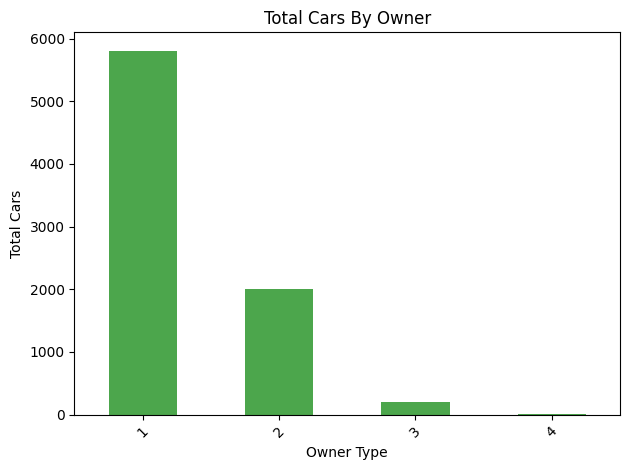

In [ ]:
Total_Car_by_Owner = df['Owner'].value_counts().head(10)

# Plotting cars  by Owner
Total_Car_by_Owner.plot(kind='bar', color='green', alpha=0.7)
plt.xlabel('Owner Type')
plt.ylabel('Total Cars')
plt.title('Total Cars By Owner')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


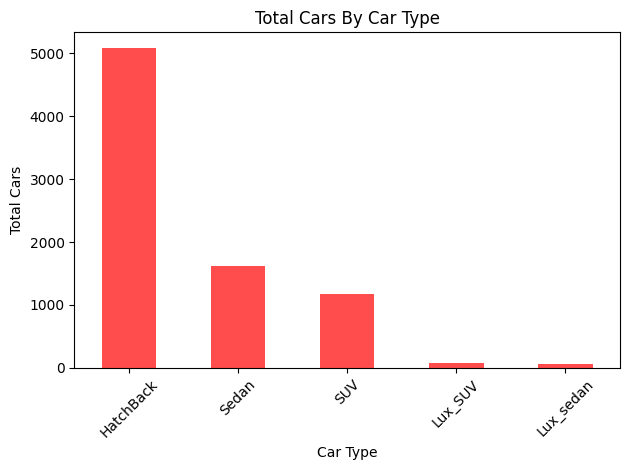

In [ ]:
Total_car_by_car_type = df['Type'].value_counts().head(5)

# Plotting cars  by car type
Total_car_by_car_type.plot(kind='bar', color='red', alpha=0.7)
plt.xlabel('Car Type')
plt.ylabel('Total Cars')
plt.title('Total Cars By Car Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8014 entries, 0 to 8014
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Year      8014 non-null   int64 
 1   Distance  8014 non-null   int64 
 2   Owner     8014 non-null   int64 
 3   Fuel      8014 non-null   object
 4   Drive     8014 non-null   object
 5   Type      8014 non-null   object
 6   Price     8014 non-null   int64 
 7   Company   8014 non-null   object
dtypes: int64(4), object(4)
memory usage: 563.5+ KB


In [ ]:
def preprocess_data(df):
    # Separate categorical and numerical columns
    cat_cols = df.select_dtypes(include=['object']).columns.tolist()
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

    # Label encode categorical columns
    label_encoders = {}
    for col in cat_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

        # Save the label encoder
        joblib.dump(label_encoders, 'encoder.pkl')

    return df, label_encoders





In [ ]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [ ]:
cat_cols

['Fuel', 'Drive', 'Type', 'Company']

In [ ]:
num_cols

['Year', 'Distance', 'Owner', 'Price']

In [ ]:
df['Drive']

0          Manual
1          Manual
2       Automatic
3          Manual
4          Manual
          ...    
8010       Manual
8011       Manual
8012       Manual
8013    Automatic
8014       Manual
Name: Drive, Length: 8014, dtype: object

In [ ]:
preprocess_data(df)

(      Year  Distance  Owner  Fuel  Drive  Type    Price  Company
 0     2022      3878      1     2      1     0   514000        9
 1     2018     32041      1     2      1     4   674000        4
 2     2021     96339      1     1      0     3  1952000       13
 3     2019     51718      1     1      1     3   690000        9
 4     2021     19811      1     2      1     0   526000       13
 ...    ...       ...    ...   ...    ...   ...      ...      ...
 8010  2018     11500      1     2      1     0   292000        1
 8011  2018     73393      2     2      1     4   534000       14
 8012  2016     83810      2     2      1     4   424000       15
 8013  2019     39162      1     2      0     0   685000        4
 8014  2022     82009      2     2      1     4   392000       13
 
 [8014 rows x 8 columns],
 {'Fuel': LabelEncoder(),
  'Drive': LabelEncoder(),
  'Type': LabelEncoder(),
  'Company': LabelEncoder()})

In [ ]:
df

,Year,Distance,Owner,Fuel,Drive,Type,Price,Company
0,2022,3878,1,2,1,0,514000,9
1,2018,32041,1,2,1,4,674000,4
2,2021,96339,1,1,0,3,1952000,13
3,2019,51718,1,1,1,3,690000,9
4,2021,19811,1,2,1,0,526000,13
...,...,...,...,...,...,...,...,...
8010,2018,11500,1,2,1,0,292000,1
8011,2018,73393,2,2,1,4,534000,14
8012,2016,83810,2,2,1,4,424000,15
8013,2019,39162,1,2,0,0,685000,4


**Feature Selection**

In [ ]:
df.columns

Index(['Year', 'Distance', 'Owner', 'Fuel', 'Drive', 'Type', 'Price',
       'Company'],
      dtype='object')

In [ ]:
X = df.drop(['Price'],axis=1)
y = df['Price']

In [ ]:
X

,Year,Distance,Owner,Fuel,Drive,Type,Company
0,2022,3878,1,2,1,0,9
1,2018,32041,1,2,1,4,4
2,2021,96339,1,1,0,3,13
3,2019,51718,1,1,1,3,9
4,2021,19811,1,2,1,0,13
...,...,...,...,...,...,...,...
8010,2018,11500,1,2,1,0,1
8011,2018,73393,2,2,1,4,14
8012,2016,83810,2,2,1,4,15
8013,2019,39162,1,2,0,0,4


In [ ]:
y

0        514000
1        674000
2       1952000
3        690000
4        526000
         ...   
8010     292000
8011     534000
8012     424000
8013     685000
8014     392000
Name: Price, Length: 8014, dtype: int64

**Data Splitting**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape

(5609, 7)

In [ ]:
X_test.shape

(2405, 7)

In [ ]:
X_train['Distance']

1272    39325
1411    63690
7070    30444
7325    67055
1471    23885
        ...  
5227    26195
5391    19301
860     48285
7604    82756
7271    84070
Name: Distance, Length: 5609, dtype: int64

In [ ]:
scaler = StandardScaler()

X_train[['Year','Distance']] = scaler.fit_transform(X_train[['Year','Distance']])

X_test[['Year','Distance']] = scaler.transform(X_test[['Year','Distance']])

# Optional: save the scaler for later use
import joblib
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

**Model Training**

In [ ]:
models = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {}
    },
    'Lasso': {
        'model': Lasso(random_state=42),
        'params': {
            'alpha': uniform(0.01, 100)
        }
    },
    'Ridge': {
        'model': Ridge(random_state=42),
        'params': {
            'alpha': uniform(0.01, 100)
        }
    },
    'ElasticNet': {
        'model': ElasticNet(random_state=42),
        'params': {
            'alpha': uniform(0.01, 100),
            'l1_ratio': uniform(0.1, 0.9)
        }
    },
    'DecisionTreeRegressor': {
        'model': DecisionTreeRegressor(random_state=42),
        'params': {
            'max_depth': [None, 3, 5, 7, 10],
            'min_samples_split': randint(2, 11),
            'min_samples_leaf': randint(1, 5)
        }
    },
    'RandomForestRegressor': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': randint(50, 201),
            'max_depth': [None, 3, 5, 7, 10],
            'min_samples_split': randint(2, 11),
            'min_samples_leaf': randint(1, 5)
        }
    },
    'AdaBoostRegressor': {
        'model': AdaBoostRegressor(random_state=42),
        'params': {
            'n_estimators': randint(50, 201),
            'learning_rate': uniform(0.01, 1.0)
        }
    },
    'GradientBoostingRegressor': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'n_estimators': randint(50, 201),
            'learning_rate': uniform(0.01, 0.2),
            'max_depth': randint(3, 8)
        }
    },
    'XGBRegressor': {
        'model': XGBRegressor(random_state=42),
        'params': {
            'n_estimators': randint(50, 201),
            'learning_rate': uniform(0.01, 0.2),
            'max_depth': randint(3, 8)
        }
    },
    'KNeighborsRegressor': {
        'model': KNeighborsRegressor(),
        'params': {
            'n_neighbors': randint(3, 10),
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    },

}

In [ ]:
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Function to calculate adjusted R^2 score
def adjusted_r2_score(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

In [ ]:
# Function to evaluate a model
def evaluate_model(model, params, X_train, y_train, X_test, y_test):
    grid_search = RandomizedSearchCV(model, params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
    grid_search.fit(X_train, y_train.values.ravel())

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    n = X_test.shape[0]
    k = X_test.shape[1]
    adj_r2 = adjusted_r2_score(r2, n, k)

    mse = mean_squared_error(y_test, y_pred)

    print(f"Model: {best_model}")
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")
    print(f"Adjusted R^2 Score: {adj_r2}")
    print("=======================================")

    return best_model, adj_r2

Evaluating LinearRegression...
Model: LinearRegression()
Best parameters: {}
Mean Squared Error: 39349182236.95912
R^2 Score: 0.4522994809395736
Adjusted R^2 Score: 0.45070002176835
Evaluating Lasso...
Model: Lasso(alpha=5.818361216819946, random_state=42)
Best parameters: {'alpha': 5.818361216819946}
Mean Squared Error: 39349360338.84902
R^2 Score: 0.4522970019427559
Adjusted R^2 Score: 0.4506975355320756
Evaluating Ridge...
Model: Ridge(alpha=5.818361216819946, random_state=42)
Best parameters: {'alpha': 5.818361216819946}
Mean Squared Error: 39351492798.3783
R^2 Score: 0.4522673202791313
Adjusted R^2 Score: 0.45066776718858226
Evaluating ElasticNet...
Model: ElasticNet(alpha=2.0684494295802445, l1_ratio=0.9729188669457949,
           random_state=42)
Best parameters: {'alpha': 2.0684494295802445, 'l1_ratio': 0.9729188669457949}
Mean Squared Error: 39765961772.885704
R^2 Score: 0.44649833450694587
Adjusted R^2 Score: 0.44488193414881017
Evaluating DecisionTreeRegressor...
Model: Deci

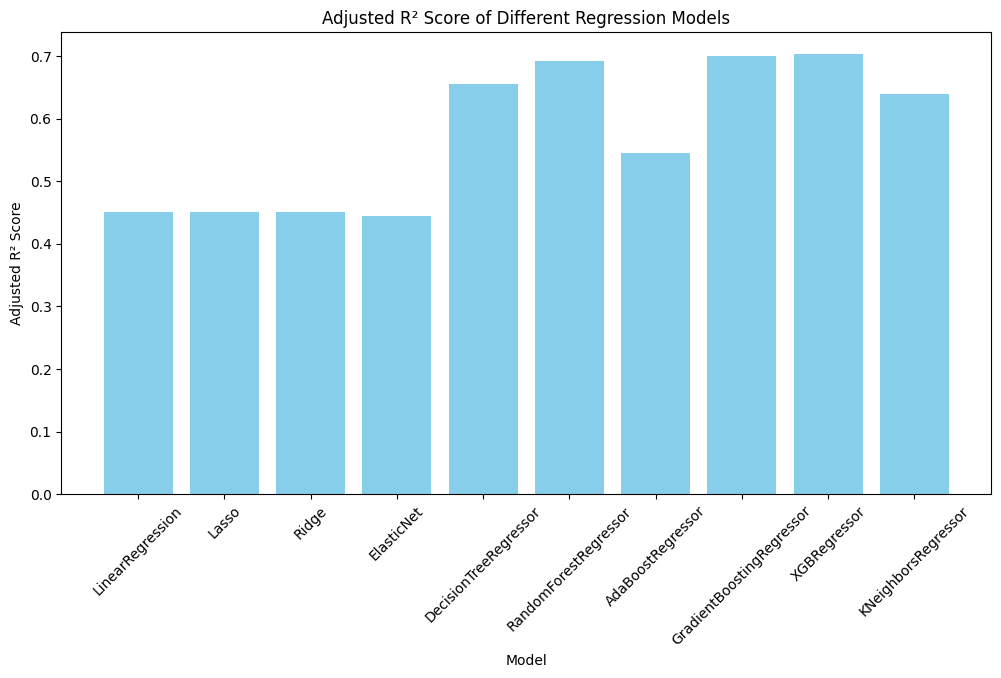

In [ ]:
adjusted_r2_scores = {}

for model_name, model_info in models.items():
    print(f"Evaluating {model_name}...")
    best_model, adj_r2 = evaluate_model(model_info['model'], model_info['params'], X_train, y_train, X_test, y_test)
    adjusted_r2_scores[model_name] = adj_r2

# Plotting the adjusted R² scores
plt.figure(figsize=(12, 6))
plt.bar(adjusted_r2_scores.keys(), adjusted_r2_scores.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('Adjusted R² Score')
plt.title('Adjusted R² Score of Different Regression Models')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import pickle

# Dictionaries to store adjusted R² scores and best models
adjusted_r2_scores = {}
all_models = {}

for model_name, model_info in models.items():
    print(f"Evaluating and Training {model_name}...")
    best_model, adj_r2 = evaluate_model(model_info['model'], model_info['params'], X_train, y_train, X_test, y_test)
    adjusted_r2_scores[model_name] = adj_r2
    all_models[model_name] = best_model

    # Save the model
    with open(f"{model_name}.pkl", 'wb') as file:
        pickle.dump(best_model, file)
    print(f"Model {model_name} saved to {model_name}.pkl")


Evaluating and Training LinearRegression...


NameError: name 'evaluate_model' is not defined

**Model Evaluation**

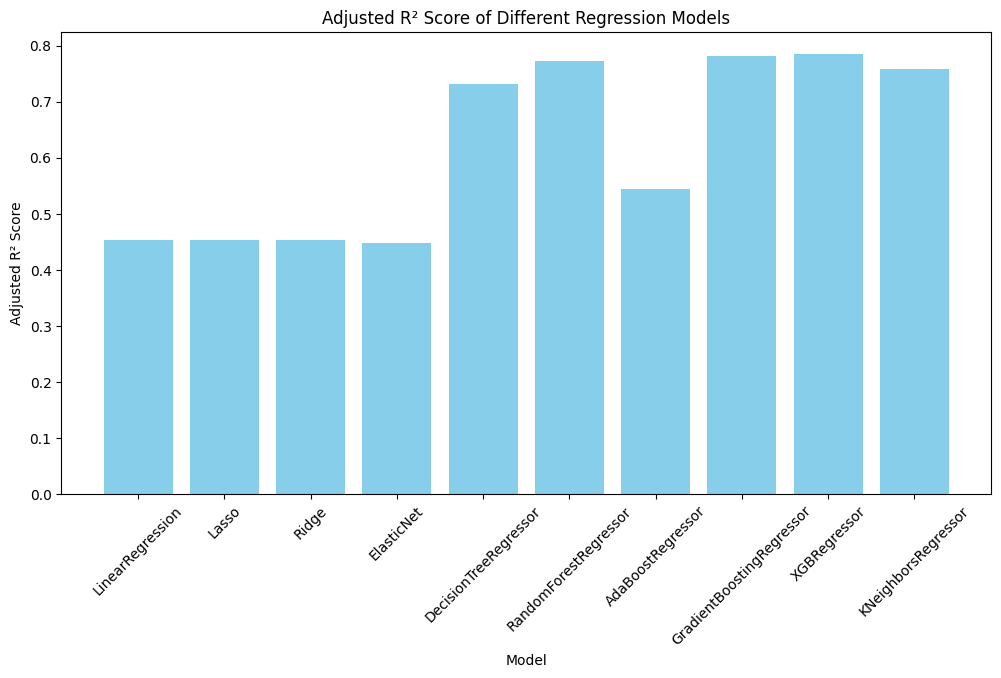

In [ ]:
# Plotting the adjusted R² scores
plt.figure(figsize=(12, 6))
plt.bar(adjusted_r2_scores.keys(), adjusted_r2_scores.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('Adjusted R² Score')
plt.title('Adjusted R² Score of Different Regression Models')
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.savefig('adjusted_r2_scores.png')

<Figure size 640x480 with 0 Axes>